# EDA - Malware Detection Dataset

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('C:\\Projects\\dataverse-nsut\\submission-3\\data\\main.csv')
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage(deep=True).sum() / 1024 ** 2:.1f} MB')


Shape: (93985, 54)
Memory: 48.1 MB


In [3]:
df.head()


,sha256,Duplicate Permissions Requested,Permissions Requested,Activities Declared,Services Declared,Broadcast Receivers,Content Providers Declared,Metadata Elements,Version Code,Target SDK Version,Is App Taking Backup,Remote Command Execution,Rootkit Installation,Exploit Delivery,Data Exfiltration,Credential Theft,Screen Logging,Keylogging,Audio Surveillance,Social Engineering Attack,GPS Spoofing,Device Bricking,Call Interception,Network Traffic Interception,Device Lockout,Browser Hijacking,System Settings Modification,File System Manipulation,Camera Hijacking,App Installation without User Consent,Location Tracking,Contact Information Theft,Browser History Theft,Package Management Manipulation,Notification Manipulation,System Log Manipulation,Process Management Manipulation,Alarm Hijacking,Calendar Event Manipulation,Task Manipulation,Fake App Installation,Bluetooth Hijacking,WiFi Network Hijacking,USB Debugging Exploitation,Screen Overlay Attack,Sim Card Manipulation,Battery Drain Attack,SMS Spamming,Ad Fraud,Account Information Theft,Certificate Manipulation,Runtime Environment Manipulation,Call Log Manipulation,Label
0,FA646D576A3290BC21081196448B4BBF852D4B0997CCE7...,1.374572,NaN,16.0,-7.439760,1.395554,1.945910,NaN,305.096502,33.495102,1,3,4,3,4,4,4,4,3,1,0,0,0,2,0,1,1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,2,0,0,0
1,0032673A2765EB4CD8B346AA2B66DECE76D0B59C441C15...,0.072408,20.563559,83.0,8.425167,0.887501,0.693147,NaN,NaN,34.026794,0,4,3,3,4,3,3,5,3,4,0,0,1,3,0,1,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,2,0,1,2,0,1,2,0,2,0,0,1
2,B41EBB9D7EC1007EE45E313463D1650237EAA66D4ABB92...,1.108002,21.732802,3.0,-28.258741,0.957791,1.386294,25.601641,477.068846,34.037137,0,2,2,2,3,2,2,2,2,1,0,0,0,2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
3,38D7CBB2975090E398DD591B701B56EC6C2719ED5E58EB...,2.466065,94.793679,7.0,6.360490,NaN,0.000000,NaN,-74.737689,12.327469,0,5,4,5,4,5,4,6,3,4,0,0,1,3,1,2,3,4,1,3,1,0,0,2,0,0,1,1,0,1,2,0,2,1,1,2,0,2,2,1,2,0,0,1
4,012848E00C0A4BDE8BF992D36F920595381B91738D8100...,NaN,NaN,3.0,NaN,-0.093837,NaN,NaN,NaN,-0.682572,0,2,2,2,3,2,2,2,2,1,0,0,1,2,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,2,0,1,0,0,1


## Basic Info

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93985 entries, 0 to 93984
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sha256                                 93985 non-null  object 
 1   Duplicate Permissions Requested        77374 non-null  float64
 2   Permissions Requested                  75816 non-null  float64
 3   Activities Declared                    93985 non-null  float64
 4   Services Declared                      81158 non-null  float64
 5   Broadcast Receivers                    73227 non-null  float64
 6   Content Providers Declared             81158 non-null  float64
 7   Metadata Elements                      60066 non-null  float64
 8   Version Code                           66799 non-null  float64
 9   Target SDK Version                     85075 non-null  float64
 10  Is App Taking Backup                   93985 non-null  int64  
 11  Re

## Data Types

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}')
df.dtypes.value_counts()


Numeric: 53, Categorical: 1


int64      44
float64     9
object      1
Name: count, dtype: int64

## Missing Values

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print('No missing values')


Duplicate Permissions Requested    16611
Permissions Requested              18169
Services Declared                  12827
Broadcast Receivers                20758
Content Providers Declared         12827
Metadata Elements                  33919
Version Code                       27186
Target SDK Version                  8910
dtype: int64


## Target Distribution

Target: Label


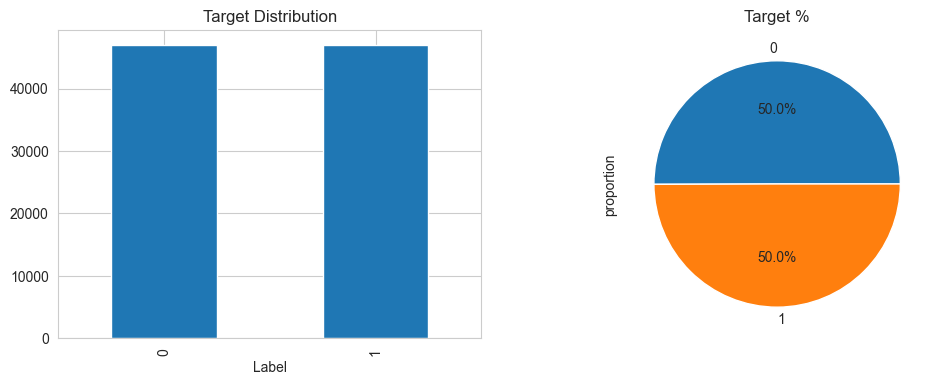

In [7]:
target_col = df.columns[-1]
print(f'Target: {target_col}')
df[target_col].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[target_col].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Target Distribution')
df[target_col].value_counts(normalize=True).plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Target %')
plt.show()


## Statistics

In [8]:
feature_cols = [col for col in df.columns if col not in ['sha256', target_col]]
numeric_features = [col for col in feature_cols if col in numeric_cols]
df[numeric_features].describe()


,Duplicate Permissions Requested,Permissions Requested,Activities Declared,Services Declared,Broadcast Receivers,Content Providers Declared,Metadata Elements,Version Code,Target SDK Version,Is App Taking Backup,Remote Command Execution,Rootkit Installation,Exploit Delivery,Data Exfiltration,Credential Theft,Screen Logging,Keylogging,Audio Surveillance,Social Engineering Attack,GPS Spoofing,Device Bricking,Call Interception,Network Traffic Interception,Device Lockout,Browser Hijacking,System Settings Modification,File System Manipulation,Camera Hijacking,App Installation without User Consent,Location Tracking,Contact Information Theft,Browser History Theft,Package Management Manipulation,Notification Manipulation,System Log Manipulation,Process Management Manipulation,Alarm Hijacking,Calendar Event Manipulation,Task Manipulation,Fake App Installation,Bluetooth Hijacking,WiFi Network Hijacking,USB Debugging Exploitation,Screen Overlay Attack,Sim Card Manipulation,Battery Drain Attack,SMS Spamming,Ad Fraud,Account Information Theft,Certificate Manipulation,Runtime Environment Manipulation,Call Log Manipulation
count,77374.000000,75816.000000,93985.000000,81158.000000,73227.000000,81158.000000,60066.000000,66799.000000,85075.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000,93985.000000
mean,0.690952,53.145676,22.749482,40.594161,0.873161,0.989240,10.096199,285.035365,30.575558,40.395308,43.093845,43.137181,42.596042,43.249231,43.193861,42.824206,43.560419,42.557334,41.692515,40.269341,40.270777,40.894004,42.283162,40.403096,41.254126,40.843337,41.676948,40.798500,40.855530,40.412130,40.396499,40.345619,40.564196,40.265564,40.375656,40.481556,40.825153,40.347949,40.663531,40.541703,40.471980,41.161696,40.349503,40.581699,41.104038,40.268021,40.760781,42.064180,40.535905,41.462244,40.387498,40.337618
std,0.991583,117.730847,45.847251,149.860983,0.486257,1.083192,13.223850,587.317436,32.433515,196.341702,195.797254,195.785762,195.894557,195.759386,195.774180,195.848001,195.702739,195.900777,196.081326,196.367269,196.366964,196.240612,195.955617,196.340360,196.165830,196.251990,196.082041,196.260407,196.249564,196.338283,196.341651,196.351999,196.308212,196.368020,196.345694,196.324666,196.254498,196.351634,196.287217,196.312653,196.326609,196.186044,196.351003,196.303736,196.197788,196.367523,196.268557,195.999753,196.313640,196.124390,196.343498,196.353669
min,-0.423358,-54.290560,0.000000,-90.573385,-0.350504,0.000000,-8.844101,-233.594284,-17.253485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.024614,5.711360,6.000000,-6.392954,0.606345,0.000000,3.212359,3.182088,18.638601,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,0.084795,20.756160,10.000000,8.908517,0.969202,0.693147,7.130794,61.184777,26.535573,0.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3

# Additional statistics


In [9]:
print('\nAdditional Statistics:')
additional_stats = pd.DataFrame({'Skewness': df[numeric_features].skew(), 'Kurtosis': df[numeric_features].kurtosis(), 'Variance': df[numeric_features].var(), 'Unique_Values': df[numeric_features].nunique()}).sort_values('Skewness', ascending=False)
print(additional_stats.head(20))



Additional Statistics:
                                  Skewness    Kurtosis      Variance  \
Metadata Elements                 8.941581  150.533847    174.870204   
Activities Declared               6.904652   62.553410   2101.970441   
Notification Manipulation         4.677611   19.880496  38560.399417   
Battery Drain Attack              4.677611   19.880494  38560.203934   
Device Bricking                   4.677610   19.880491  38559.984742   
GPS Spoofing                      4.677609   19.880486  38560.104464   
Ad Fraud                          4.677601   19.880438  38415.903312   
USB Debugging Exploitation        4.677597   19.880415  38553.716543   
System Log Manipulation           4.677594   19.880393  38551.631460   
Is App Taking Backup              4.677591   19.880378  38550.063778   
Location Tracking                 4.677589   19.880365  38548.721257   
Browser Hijacking                 4.677589   19.880363  38481.032989   
Browser History Theft             4.6775

## 5. Feature Distribution Analysis

## Creating the file to be submitted

In [10]:
constant_features = []
quasi_constant_features = []
binary_features = []
low_variance_features = []
for col in numeric_features:
    unique_count = df[col].nunique()
    variance = df[col].var()
    if unique_count == 1:
        constant_features.append(col)
    elif unique_count == 2:
        binary_features.append(col)
    elif unique_count < 10:
        quasi_constant_features.append(col)
    if variance < 0.01:
        low_variance_features.append(col)
print(f'Constant Features (nunique=1): {len(constant_features)}')
if constant_features:
    print(f'  Examples: {constant_features[:5]}')
print(f'\nBinary Features (nunique=2): {len(binary_features)}')
if binary_features:
    print(f'  Examples: {binary_features[:10]}')
print(f'\nQuasi-Constant Features (nunique<10): {len(quasi_constant_features)}')
if quasi_constant_features:
    print(f'  Examples: {quasi_constant_features[:10]}')
print(f'\nLow Variance Features (var<0.01): {len(low_variance_features)}')
if low_variance_features:
    print(f'  Examples: {low_variance_features[:10]}')


Constant Features (nunique=1): 0

Binary Features (nunique=2): 0

Quasi-Constant Features (nunique<10): 40
  Examples: ['Is App Taking Backup', 'Exploit Delivery', 'Data Exfiltration', 'Credential Theft', 'Screen Logging', 'Audio Surveillance', 'Social Engineering Attack', 'GPS Spoofing', 'Device Bricking', 'Call Interception']

Low Variance Features (var<0.01): 0


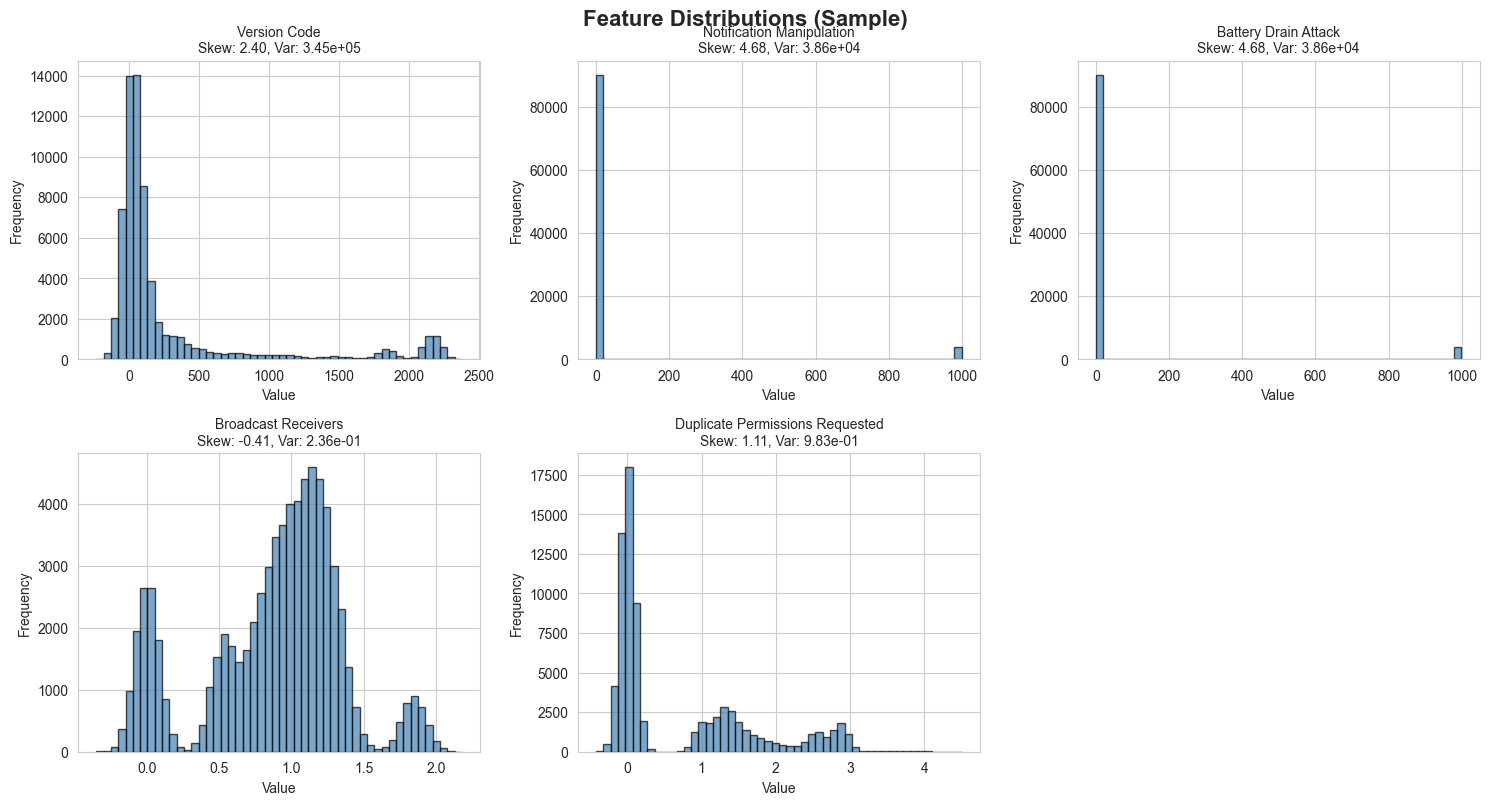

In [11]:
sample_features = []
high_var_features = additional_stats.nlargest(5, 'Variance').index.tolist()
sample_features.extend(high_var_features[:3])
if len(binary_features) > 0:
    sample_features.extend(binary_features[:3])
if len(additional_stats) > 10:
    sample_features.extend(additional_stats.nsmallest(2, 'Skewness').index.tolist())
sample_features = list(dict.fromkeys(sample_features))[:12]
if len(sample_features) > 0:
    n_cols = 3
    n_rows = (len(sample_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    for idx, col in enumerate(sample_features):
        if idx < len(axes):
            df[col].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7, color='steelblue')
            axes[idx].set_title(f'{col}\nSkew: {df[col].skew():.2f}, Var: {df[col].var():.2e}', fontsize=10)
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
    for idx in range(len(sample_features), len(axes)):
        axes[idx].axis('off')
    plt.tight_layout()
    plt.suptitle('Feature Distributions (Sample)', fontsize=16, fontweight='bold', y=1.001)
    plt.show()
else:
    print('No features to visualize')


Top 20 Features with Most Outliers (IQR Method):
                                  Feature  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
29                      Location Tracking          21702           23.090919     0.000000     0.000000
35        Process Management Manipulation          21638           23.022823     0.000000     0.000000
32        Package Management Manipulation          21577           22.957919     0.000000     0.000000
9                    Is App Taking Backup          20121           21.408735     0.000000     0.000000
39                  Fake App Installation          19950           21.226792     0.000000     0.000000
34                System Log Manipulation          18274           19.443528     0.000000     0.000000
24                      Browser Hijacking          18200           19.364792     1.000000     1.000000
40                    Bluetooth Hijacking          18050           19.205192     0.000000     0.000000
12                      

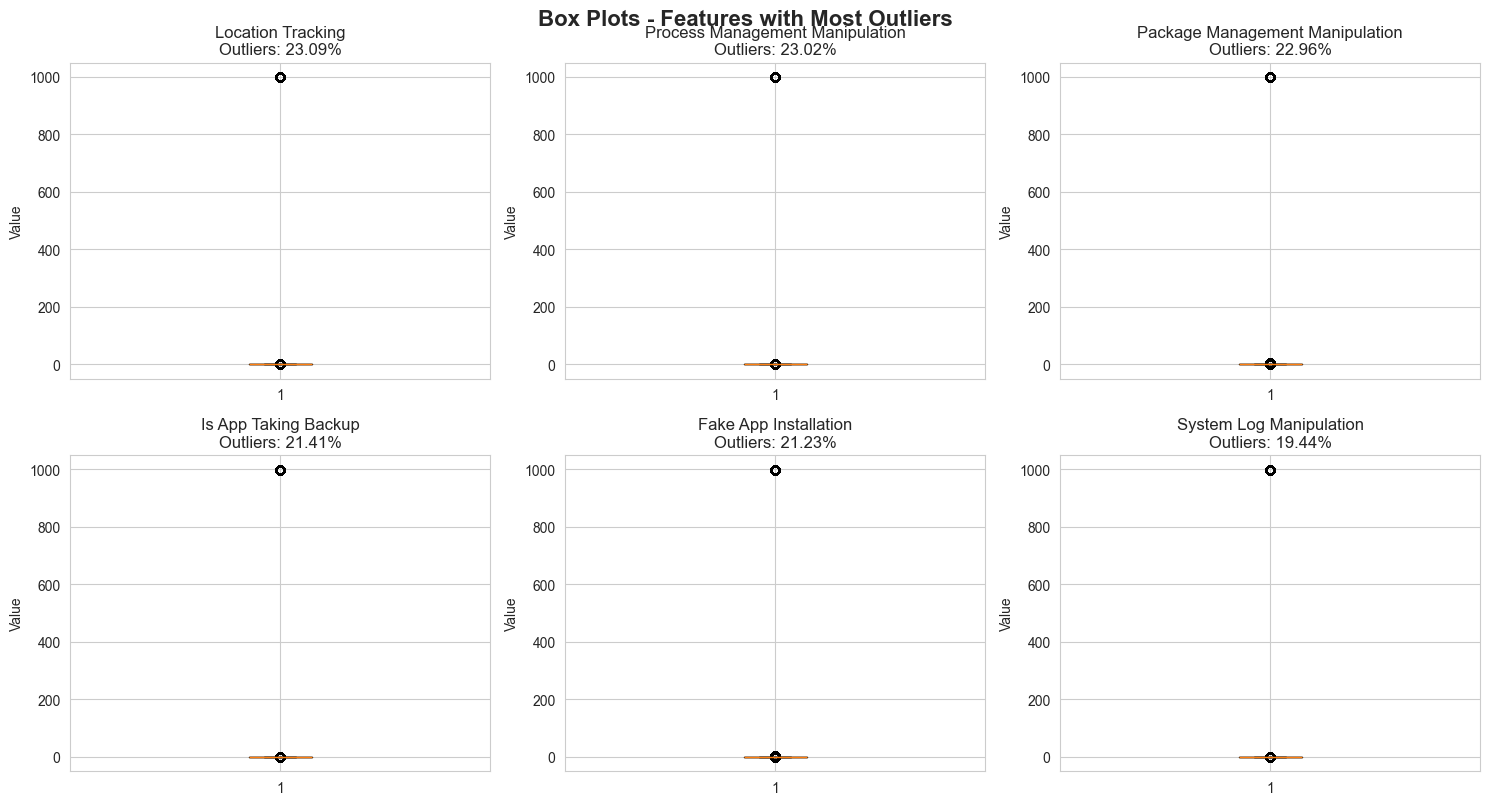

In [12]:
outlier_summary = []
for col in numeric_features[:50]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = outlier_count / len(df) * 100
    if outlier_count > 0:
        outlier_summary.append({'Feature': col, 'Outlier_Count': outlier_count, 'Outlier_Percentage': outlier_pct, 'Lower_Bound': lower_bound, 'Upper_Bound': upper_bound})
outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)
print('Top 20 Features with Most Outliers (IQR Method):')
print(outlier_df.head(20).to_string())
if len(outlier_df) > 0:
    top_outlier_features = outlier_df.head(6)['Feature'].tolist()
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    for idx, col in enumerate(top_outlier_features):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(f'{col}\nOutliers: {outlier_df[outlier_df['Feature'] == col]['Outlier_Percentage'].values[0]:.2f}%')
        axes[idx].set_ylabel('Value')
    plt.tight_layout()
    plt.suptitle('Box Plots - Features with Most Outliers', fontsize=16, fontweight='bold', y=1.001)
    plt.show()


Correlation Matrix Shape: (30, 30)

Highly Correlated Feature Pairs (|correlation| > 0.7):
                      Feature_1                         Feature_2  Correlation
31    Notification Manipulation                   Device Bricking     1.000000
29    Notification Manipulation              Battery Drain Attack     1.000000
58         Battery Drain Attack                   Device Bricking     1.000000
30    Notification Manipulation                      GPS Spoofing     1.000000
57         Battery Drain Attack                      GPS Spoofing     1.000000
84                 GPS Spoofing                   Device Bricking     1.000000
208  USB Debugging Exploitation                    Device Lockout     0.999999
209  USB Debugging Exploitation                 Location Tracking     0.999999
110             Device Bricking             Call Log Manipulation     0.999999
32    Notification Manipulation             Call Log Manipulation     0.999999
111             Device Bricking         

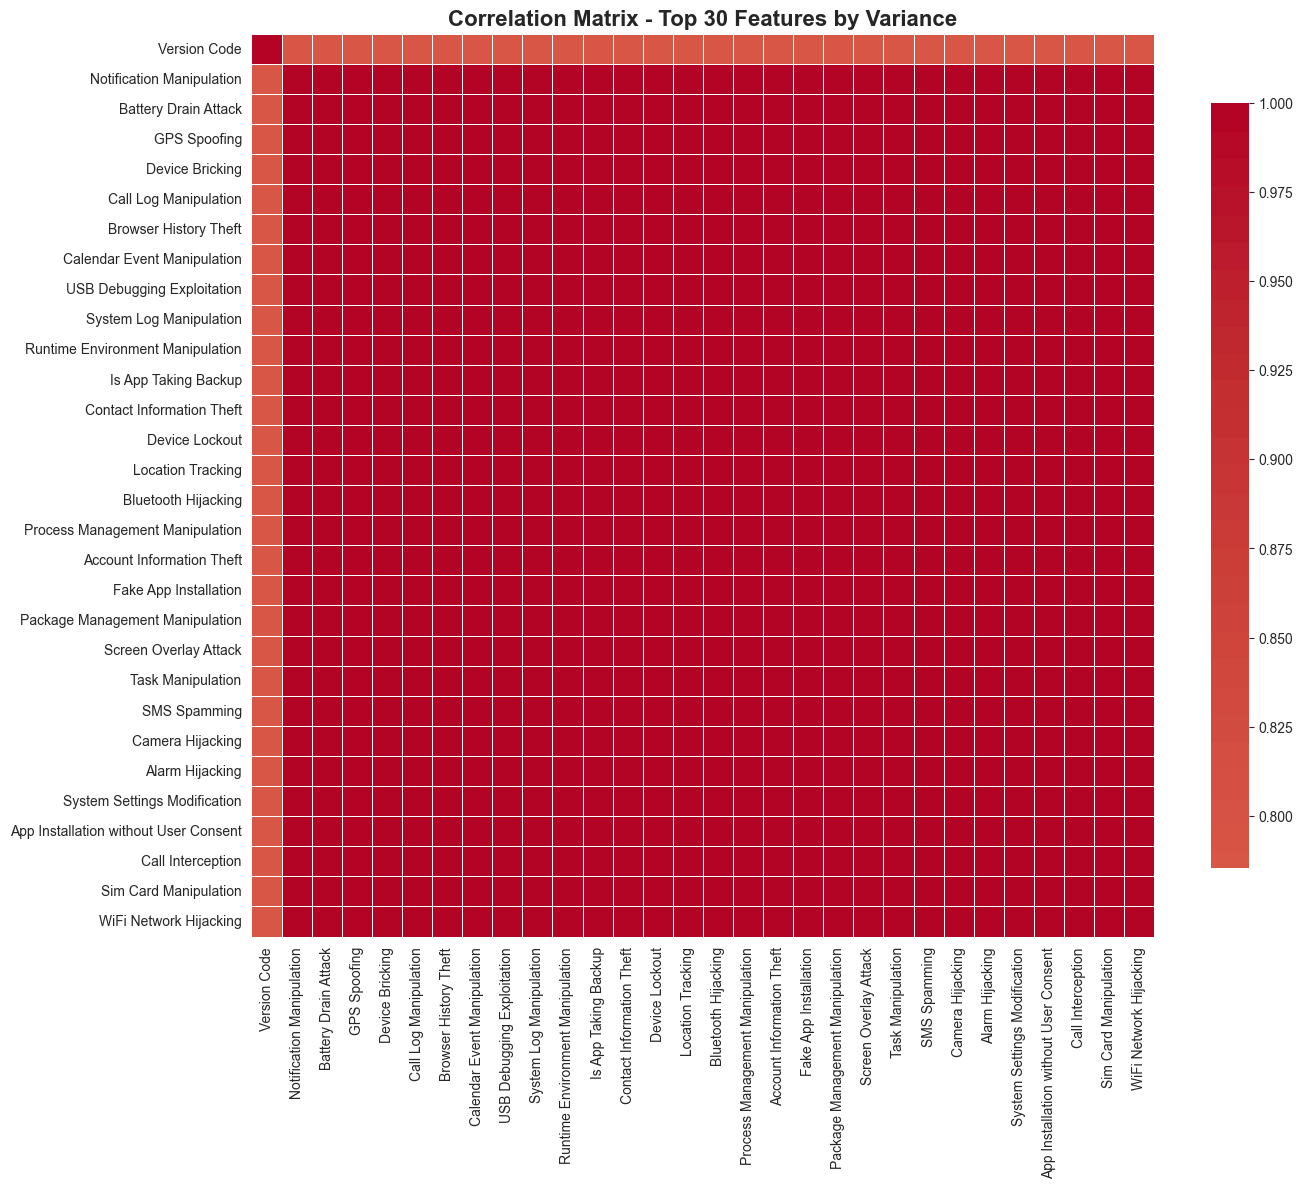

In [13]:
top_variance_features = additional_stats.nlargest(30, 'Variance').index.tolist()
correlation_matrix = df[top_variance_features].corr()
print(f'Correlation Matrix Shape: {correlation_matrix.shape}')
print(f'\nHighly Correlated Feature Pairs (|correlation| > 0.7):')
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({'Feature_1': correlation_matrix.columns[i], 'Feature_2': correlation_matrix.columns[j], 'Correlation': correlation_matrix.iloc[i, j]})
if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.head(20).to_string())
    print(f'\nTotal highly correlated pairs: {len(high_corr_pairs)}')
else:
    print('No feature pairs with correlation > 0.7 found')
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Top 30 Features by Variance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Top 30 Features Most Correlated with Target:
                                  Feature  Correlation_with_Target  Abs_Correlation
0         Duplicate Permissions Requested                 0.505814         0.505814
5              Content Providers Declared                -0.405224         0.405224
6                       Metadata Elements                -0.340065         0.340065
8                      Target SDK Version                -0.218617         0.218617
2                     Activities Declared                 0.150376         0.150376
1                   Permissions Requested                 0.110425         0.110425
4                     Broadcast Receivers                -0.074735         0.074735
7                            Version Code                 0.036661         0.036661
16                             Keylogging                 0.005630         0.005630
10               Remote Command Execution                 0.005267         0.005267
18              Social Engineer

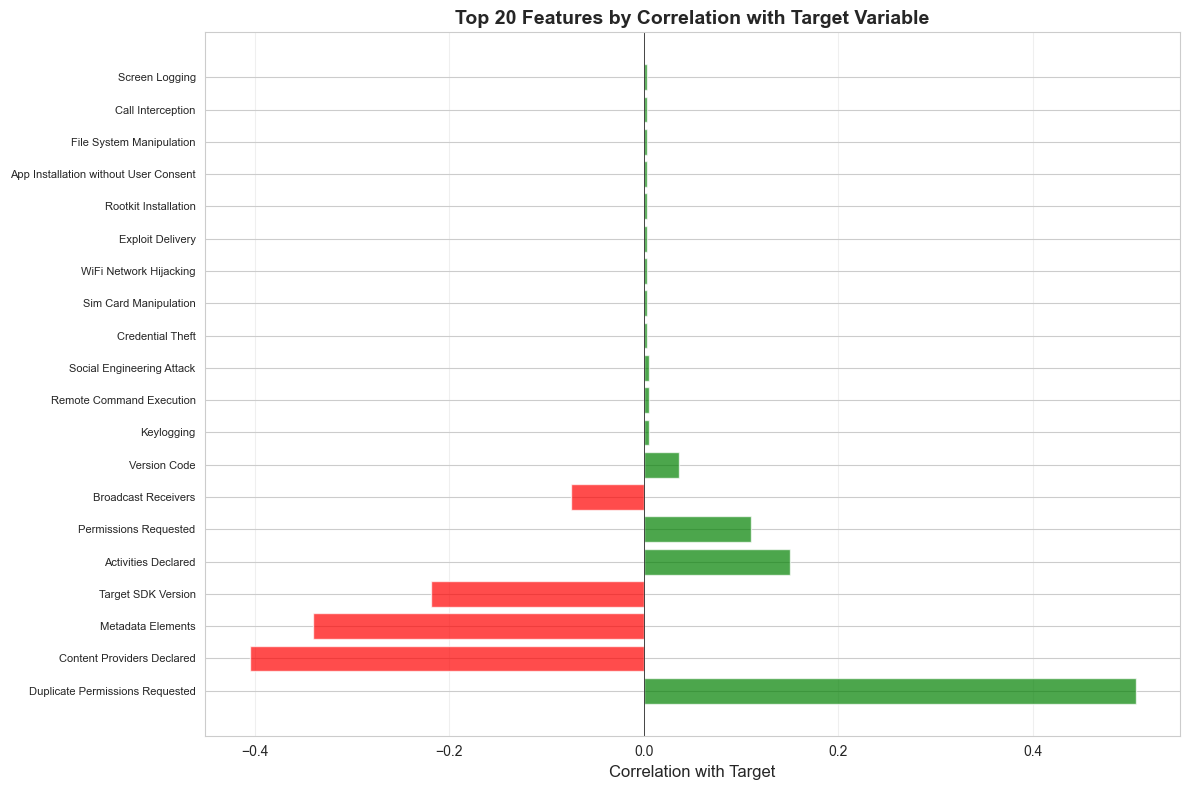

In [14]:
target_correlations = []
for col in numeric_features:
    corr = df[col].corr(df[target_col])
    target_correlations.append({'Feature': col, 'Correlation_with_Target': corr, 'Abs_Correlation': abs(corr)})
target_corr_df = pd.DataFrame(target_correlations).sort_values('Abs_Correlation', ascending=False)
print('Top 30 Features Most Correlated with Target:')
print(target_corr_df.head(30).to_string())
top_n = min(20, len(target_corr_df))
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in target_corr_df.head(top_n)['Correlation_with_Target']]
plt.barh(range(top_n), target_corr_df.head(top_n)['Correlation_with_Target'], color=colors, alpha=0.7)
plt.yticks(range(top_n), target_corr_df.head(top_n)['Feature'], fontsize=8)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title(f'Top {top_n} Features by Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Calculating Mutual Information... (this may take a moment)

Top 30 Features by Mutual Information with Target:
                                  Feature  Mutual_Information
21                      Call Interception            0.442903
44                  Sim Card Manipulation            0.367106
8                      Target SDK Version            0.325466
38                      Task Manipulation            0.312853
41                 WiFi Network Hijacking            0.302585
18              Social Engineering Attack            0.257568
10               Remote Command Execution            0.225517
28  App Installation without User Consent            0.207791
16                             Keylogging            0.200997
5              Content Providers Declared            0.192388
26               File System Manipulation            0.190753
12                       Exploit Delivery            0.189125
43                  Screen Overlay Attack            0.169335
0         Duplicate P

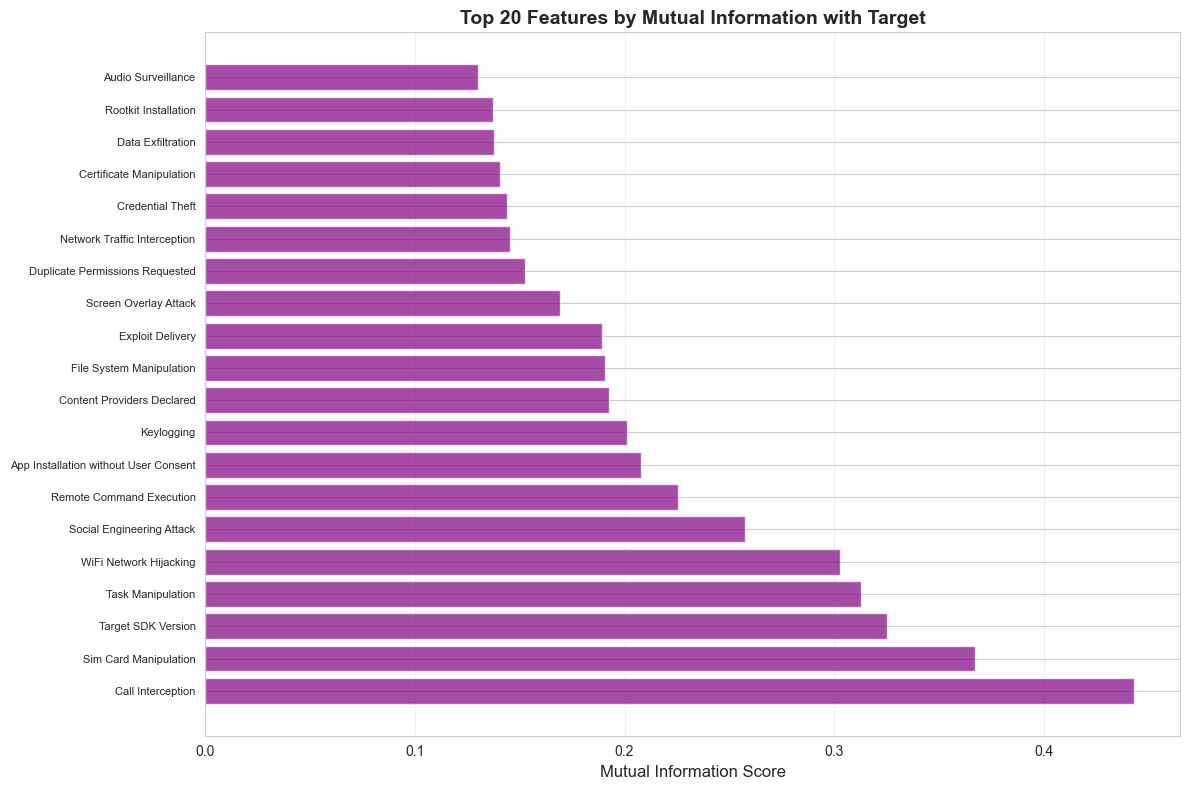


Comparison: Correlation vs Mutual Information (Top 20 by MI):
                                  Feature  Correlation_with_Target  Mutual_Information
18                      Call Interception                 0.002968            0.442903
12                  Sim Card Manipulation                 0.003616            0.367106
3                      Target SDK Version                -0.218617            0.325466
21                      Task Manipulation                 0.002398            0.312853
13                 WiFi Network Hijacking                 0.003565            0.302585
10              Social Engineering Attack                 0.004914            0.257568
9                Remote Command Execution                 0.005267            0.225517
16  App Installation without User Consent                 0.003242            0.207791
8                              Keylogging                 0.005630            0.200997
1              Content Providers Declared                -0.405224 

In [15]:
print('Calculating Mutual Information... (this may take a moment)')
sample_size = min(len(numeric_features), 100)
features_for_mi = numeric_features[:sample_size]
X_mi = df[features_for_mi].fillna(0)
y_mi = df[target_col]
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)
mi_df = pd.DataFrame({'Feature': features_for_mi, 'Mutual_Information': mi_scores}).sort_values('Mutual_Information', ascending=False)
print('\nTop 30 Features by Mutual Information with Target:')
print(mi_df.head(30).to_string())
top_n = min(20, len(mi_df))
plt.figure(figsize=(12, 8))
plt.barh(range(top_n), mi_df.head(top_n)['Mutual_Information'], color='purple', alpha=0.7)
plt.yticks(range(top_n), mi_df.head(top_n)['Feature'], fontsize=8)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.title(f'Top {top_n} Features by Mutual Information with Target', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
comparison_df = target_corr_df.merge(mi_df, on='Feature', how='inner')
comparison_df = comparison_df.sort_values('Mutual_Information', ascending=False).head(20)
print('\nComparison: Correlation vs Mutual Information (Top 20 by MI):')
print(comparison_df[['Feature', 'Correlation_with_Target', 'Mutual_Information']].to_string())


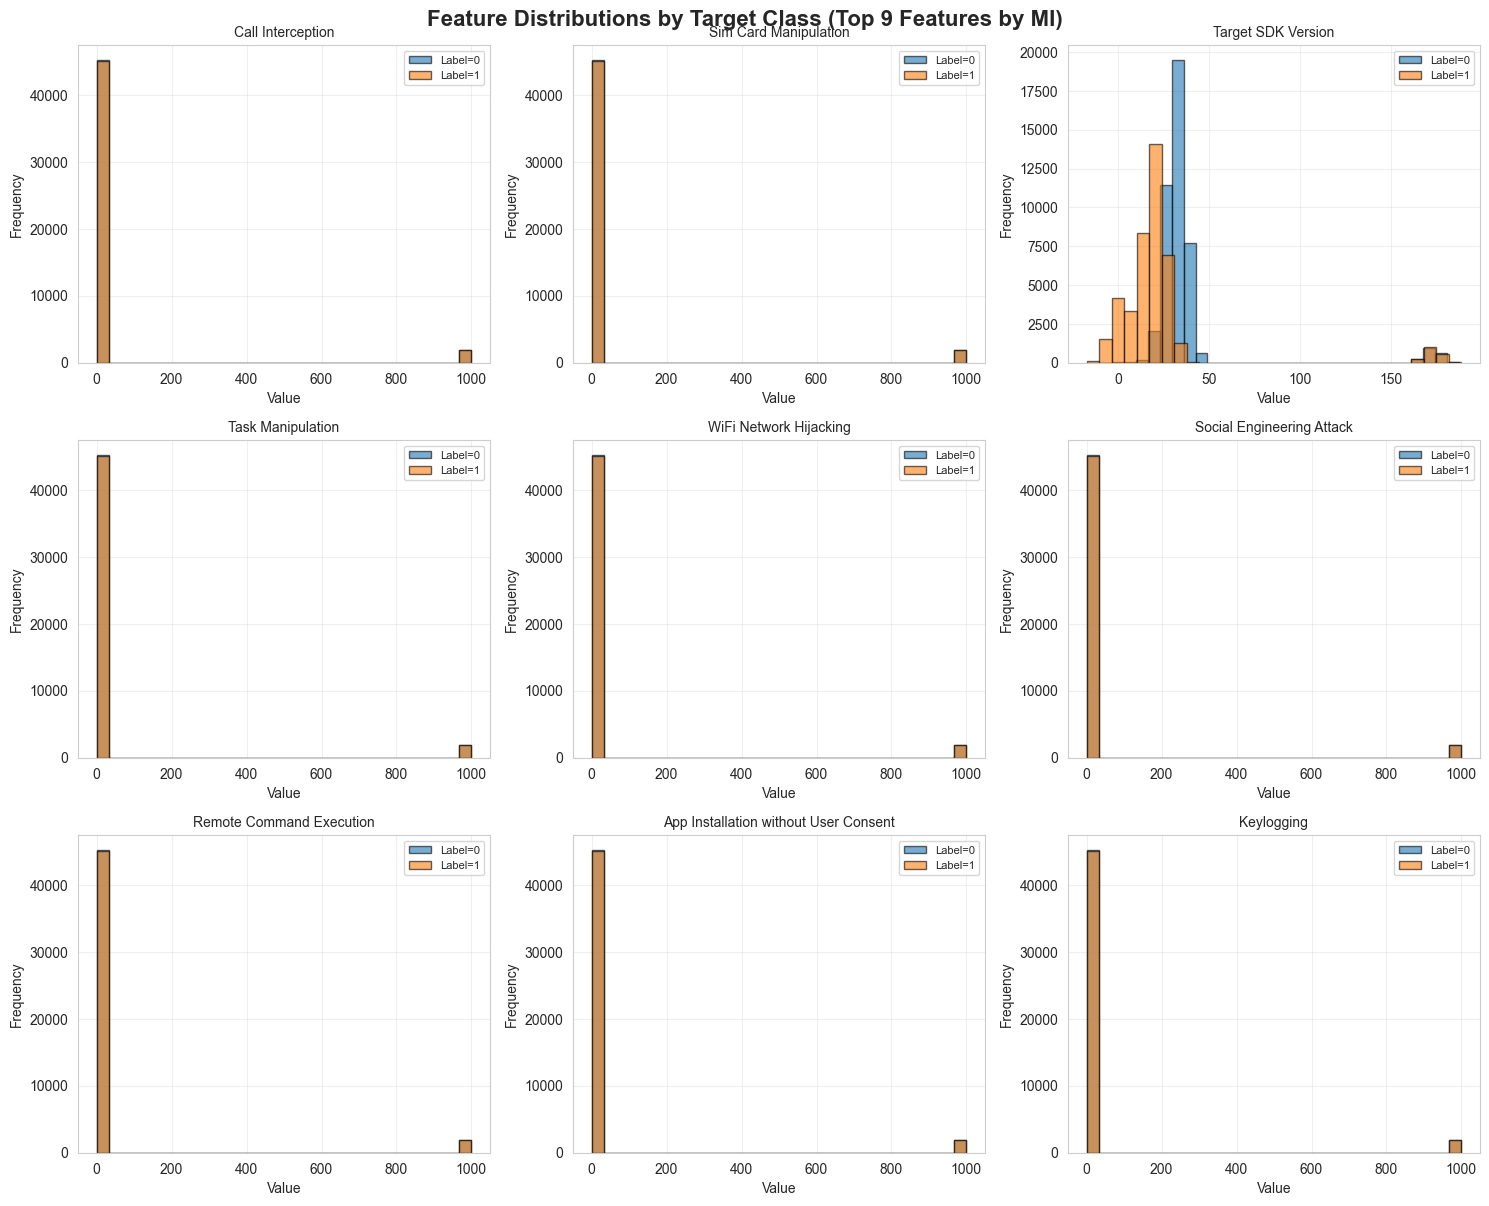

In [16]:
top_features_for_viz = mi_df.head(9)['Feature'].tolist()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for idx, feature in enumerate(top_features_for_viz):
    for target_value in df[target_col].unique():
        subset = df[df[target_col] == target_value][feature]
        axes[idx].hist(subset, bins=30, alpha=0.6, label=f'{target_col}={target_value}', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=10)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)
plt.tight_layout()
plt.suptitle('Feature Distributions by Target Class (Top 9 Features by MI)', fontsize=16, fontweight='bold', y=1.001)
plt.show()


In [17]:
from scipy.stats import ttest_ind
ttest_results = []
target_classes = df[target_col].unique()
if len(target_classes) == 2:
    class_0 = df[df[target_col] == target_classes[0]]
    class_1 = df[df[target_col] == target_classes[1]]
    for feature in top_features_for_viz:
        stat, pvalue = ttest_ind(class_0[feature].dropna(), class_1[feature].dropna())
        ttest_results.append({'Feature': feature, 'T_Statistic': stat, 'P_Value': pvalue, 'Significant': 'Yes' if pvalue < 0.05 else 'No', 'Mean_Class_0': class_0[feature].mean(), 'Mean_Class_1': class_1[feature].mean()})
    ttest_df = pd.DataFrame(ttest_results).sort_values('P_Value')
    print('T-Test Results for Top Features:')
    print(ttest_df.to_string())
    print('\nInterpretation: P-value < 0.05 indicates significant difference in means between classes')
else:
    print('T-test requires binary target. Skipping this analysis.')


T-Test Results for Top Features:
                                 Feature  T_Statistic   P_Value Significant  Mean_Class_0  Mean_Class_1
2                     Target SDK Version    65.345288  0.000000         Yes     37.527618     23.343909
8                             Keylogging    -1.726100  0.084333          No     42.459596     44.663330
6               Remote Command Execution    -1.614667  0.106386          No     42.063588     44.126054
5              Social Engineering Attack    -1.506478  0.131948          No     40.729893     42.656961
1                  Sim Card Manipulation    -1.108516  0.267642          No     40.395285     41.814135
4                 WiFi Network Hijacking    -1.093055  0.274372          No     40.462870     41.861847
7  App Installation without User Consent    -0.993800  0.320323          No     40.219955     41.492311
0                      Call Interception    -0.909927  0.362863          No     40.312095     41.477017
3                      Task Man

In [18]:
print('Feature Value Ranges by Target Class:')
for feature in mi_df.head(10)['Feature']:
    print(f'\n{feature}:')
    print('-' * 40)
    for target_value in sorted(df[target_col].unique()):
        subset = df[df[target_col] == target_value][feature]
        print(f'  Class {target_value}: min={subset.min():.4f}, max={subset.max():.4f}, ' + f'mean={subset.mean():.4f}, median={subset.median():.4f}, std={subset.std():.4f}')


Feature Value Ranges by Target Class:

Call Interception:
----------------------------------------
  Class 0: min=0.0000, max=999.0000, mean=40.3121, median=0.0000, std=196.0473
  Class 1: min=0.0000, max=999.0000, mean=41.4770, median=1.0000, std=196.4344

Sim Card Manipulation:
----------------------------------------
  Class 0: min=0.0000, max=999.0000, mean=40.3953, median=0.0000, std=196.0301
  Class 1: min=0.0000, max=999.0000, mean=41.8141, median=2.0000, std=196.3652

Target SDK Version:
----------------------------------------
  Class 0: min=-10.2083, max=187.2230, mean=37.5276, median=31.8650, std=29.2744
  Class 1: min=-17.2535, max=188.1611, mean=23.3439, median=18.6741, std=33.9436

Task Manipulation:
----------------------------------------
  Class 0: min=0.0000, max=999.0000, mean=40.1932, median=0.0000, std=196.0711
  Class 1: min=0.0000, max=999.0000, mean=41.1347, median=1.0000, std=196.5045

WiFi Network Hijacking:
----------------------------------------
  Class 0: 

In [19]:
variance_analysis = []
for feature in mi_df.head(20)['Feature']:
    variances = {}
    for target_value in df[target_col].unique():
        variances[f'Var_Class_{target_value}'] = df[df[target_col] == target_value][feature].var()
    variance_analysis.append({'Feature': feature, **variances, 'Variance_Ratio': max(variances.values()) / (min(variances.values()) + 1e-10)})
variance_df = pd.DataFrame(variance_analysis).sort_values('Variance_Ratio', ascending=False)
print('Variance Analysis by Target Class (Top 20 Features by MI):')
print(variance_df.head(15).to_string())
print('\nNote: High variance ratio indicates different spread of values across classes')


Variance Analysis by Target Class (Top 20 Features by MI):
                                  Feature   Var_Class_0   Var_Class_1  Variance_Ratio
13        Duplicate Permissions Requested      0.216337      1.250166        5.778798
9              Content Providers Declared      0.768052      1.194439        1.555153
2                      Target SDK Version    856.989460   1152.167629        1.344436
14           Network Traffic Interception  38306.639348  38491.276943        1.004820
12                  Screen Overlay Attack  38443.712436  38627.293829        1.004775
16               Certificate Manipulation  38376.102897  38554.090973        1.004638
17                      Data Exfiltration  38233.871100  38410.229847        1.004613
19                     Audio Surveillance  38291.712611  38463.083581        1.004475
3                       Task Manipulation  38443.866275  38614.014604        1.004426
0                       Call Interception  38434.560219  38586.480333        1.00

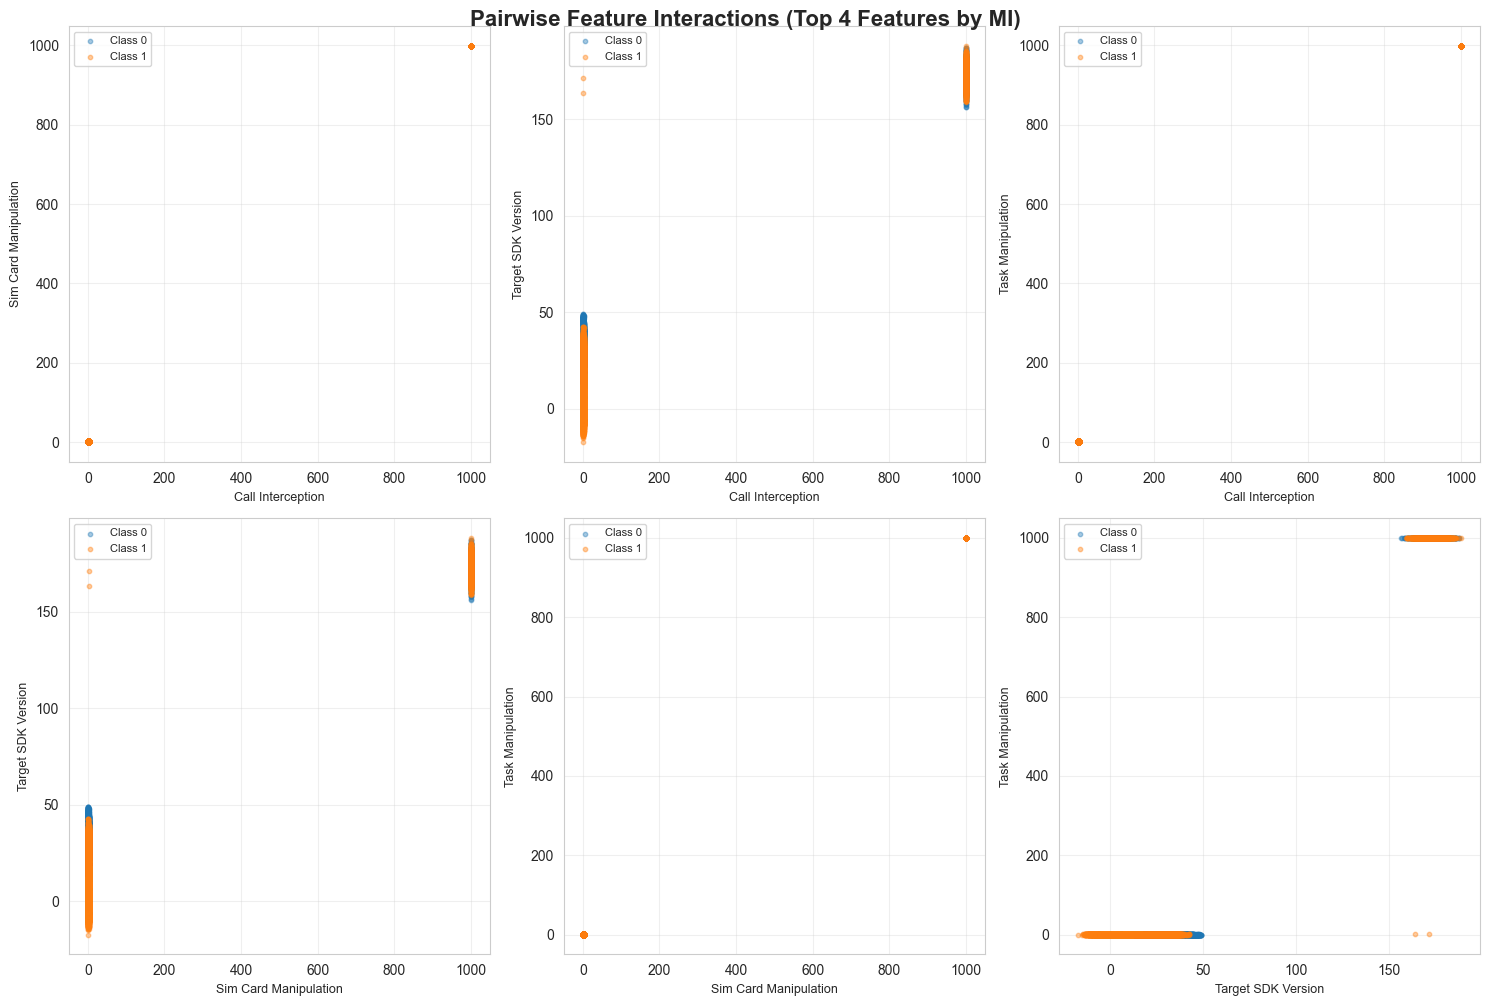

In [20]:
top_4_features = mi_df.head(4)['Feature'].tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
plot_idx = 0
for i in range(len(top_4_features)):
    for j in range(i + 1, len(top_4_features)):
        if plot_idx < 6:
            for target_value in df[target_col].unique():
                subset = df[df[target_col] == target_value]
                axes[plot_idx].scatter(subset[top_4_features[i]], subset[top_4_features[j]], alpha=0.4, s=10, label=f'Class {target_value}')
            axes[plot_idx].set_xlabel(top_4_features[i], fontsize=9)
            axes[plot_idx].set_ylabel(top_4_features[j], fontsize=9)
            axes[plot_idx].legend(fontsize=8)
            axes[plot_idx].grid(alpha=0.3)
            plot_idx += 1
for idx in range(plot_idx, 6):
    axes[idx].axis('off')
plt.tight_layout()
plt.suptitle('Pairwise Feature Interactions (Top 4 Features by MI)', fontsize=16, fontweight='bold', y=1.001)
plt.show()


## Handle Missing Values


In [21]:
df_processed = df.copy()
missing_before = df_processed.isnull().sum().sum()
print(f'Total missing values before handling: {missing_before}')
if missing_before > 0:
    for col in numeric_features:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
    print(f'Missing values filled with median for numeric features')
else:
    print('No missing values to handle')
missing_after = df_processed.isnull().sum().sum()
print(f'Total missing values after handling: {missing_after}')


Total missing values before handling: 151207
Missing values filled with median for numeric features
Total missing values after handling: 0


In [22]:
features_before = df_processed.shape[1]
if len(constant_features) > 0:
    df_processed.drop(columns=constant_features, inplace=True)
    print(f'Removed {len(constant_features)} constant features')
else:
    print('No constant features to remove')
quasi_const_to_remove = []
for col in numeric_features:
    if col in df_processed.columns:
        value_counts = df_processed[col].value_counts(normalize=True)
        if len(value_counts) > 0 and value_counts.iloc[0] > 0.99:
            quasi_const_to_remove.append(col)
if len(quasi_const_to_remove) > 0:
    df_processed.drop(columns=quasi_const_to_remove, inplace=True)
    print(f'Removed {len(quasi_const_to_remove)} quasi-constant features (>99% same value)')
features_after = df_processed.shape[1]
print(f'\nFeatures before: {features_before}, Features after: {features_after}')


No constant features to remove

Features before: 54, Features after: 54


In [23]:
df_capped = df_processed.copy()
capped_features = 0
if len(outlier_df) > 0:
    features_to_cap = outlier_df[outlier_df['Outlier_Percentage'] > 10]['Feature'].tolist()
    for col in features_to_cap:
        if col in df_capped.columns:
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
            capped_features += 1
    print(f'Capped outliers in {capped_features} features with >10% outlier rate')
    print('Note: df_capped contains the capped version, df_processed retains original values')
else:
    print('No features with significant outliers to cap')


Capped outliers in 20 features with >10% outlier rate
Note: df_capped contains the capped version, df_processed retains original values


In [24]:
X = df_processed.drop(columns=[target_col, 'sha256'] if 'sha256' in df_processed.columns else [target_col])
y = df_processed[target_col]
print(f'Feature matrix shape: {X.shape}')
print(f'Target vector shape: {y.shape}')
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
print('\nFeatures scaled using StandardScaler (mean=0, std=1)')
print('Sample of scaled features:')
print(X_scaled.head())


Feature matrix shape: (93985, 52)
Target vector shape: (93985,)

Features scaled using StandardScaler (mean=0, std=1)
Sample of scaled features:
   Duplicate Permissions Requested  Permissions Requested  \
0                         0.851251              -0.245309   
1                        -0.550538              -0.247118   
2                         0.564287              -0.236140   
3                         2.026252               0.449809   
4                        -0.537203              -0.245309   

   Activities Declared  Services Declared  Broadcast Receivers  \
0            -0.147217          -0.312919             1.162685   
1             1.314165          -0.199341            -0.015943   
2            -0.430769          -0.461964             0.147122   
3            -0.343523          -0.214122             0.173595   
4            -0.430769          -0.195881            -2.292541   

   Content Providers Declared  Metadata Elements  Version Code  \
0                    0.98

In [25]:
def remove_correlated_features(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return to_drop
correlated_features = remove_correlated_features(X_scaled, threshold=0.95)
print(f'Features to remove due to high correlation (>0.95): {len(correlated_features)}')
if len(correlated_features) > 0:
    print(f'Examples: {correlated_features[:10]}')
    X_reduced = X_scaled.drop(columns=correlated_features)
    print(f'\nOriginal features: {X_scaled.shape[1]}')
    print(f'Reduced features: {X_reduced.shape[1]}')
else:
    X_reduced = X_scaled
    print('No highly correlated feature pairs found')


Features to remove due to high correlation (>0.95): 43
Examples: ['Is App Taking Backup', 'Remote Command Execution', 'Rootkit Installation', 'Exploit Delivery', 'Data Exfiltration', 'Credential Theft', 'Screen Logging', 'Keylogging', 'Audio Surveillance', 'Social Engineering Attack']

Original features: 52
Reduced features: 9


## Model Training - Gradient Boosting Ensemble


In [26]:
print(f'Reduced features ({len(X_reduced.columns)}):')
print(X_reduced.columns.tolist())


Reduced features (9):
['Duplicate Permissions Requested', 'Permissions Requested', 'Activities Declared', 'Services Declared', 'Broadcast Receivers', 'Content Providers Declared', 'Metadata Elements', 'Version Code', 'Target SDK Version']


In [28]:
(df[behavior_features] == 999).any(axis=1).sum() / len(df) * 100


NameError: name 'behavior_features' is not defined